# NBA player performance
We'll explore some correlation, regression, and dimensionality reduction analyses based on National Basketball Association player data from Basketball Reference. You can find the original dataset at https://www.basketball-reference.com/leagues/NBA_2023_totals.html.

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import statsmodels.formula.api as smf


In [ ]:
# Load the NBA data
nba_data_url = 'https://drive.google.com/uc?export=download&id=1zhPFKDIzNi0O6rcoVbX_FM6ZuUY9gFQE' #←"NBA 2022-2023 Stats.csv" (Data as of 2023-10-10)
nba_data_raw = pd.read_csv(nba_data_url)

In [ ]:
# For our main analysis, we'll just use a subset of the columns
#  (you can use others in your choose-your-own questions if you'd like).
important_cols = ["Rank","Player","Position","Age","Team","Games","GamesStarted","MinutesPlayed",
                  "FieldGoals","FieldGoalAttempts","FieldGoalPercentage",
                  "ThreePointsFieldGoals","ThreePointsFieldGoalsAttempt","ThreePointsFieldGoalsPercentage",
                  "TwoPointsFieldGoals","TwoPointsFieldGoalsAttempt","TwoPointsFieldGoalsPercentage",
                  "EffectiveFieldGoalPercentage",
                  "FreeThrows","FreeThrowAttempts","FreeThrowPercentage",
                  "OffensiveRebounds","DefensiveRebounds","TotalRebounds",
                  "Assists","Steals","Blocks","Turnovers","PersonalFouls","Points"]
nba_data = nba_data_raw[important_cols]
nba_data.head()

,Rank,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,FieldGoals,FieldGoalAttempts,...,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,0.702,100,228,328,50,31,30,59,102,508
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,0.364,214,271,485,97,36,46,79,98,361
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,0.806,184,504,688,240,88,61,187,208,1529
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,0.812,43,78,121,67,16,15,41,99,467
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,0.750,85,286,371,97,45,48,60,143,696


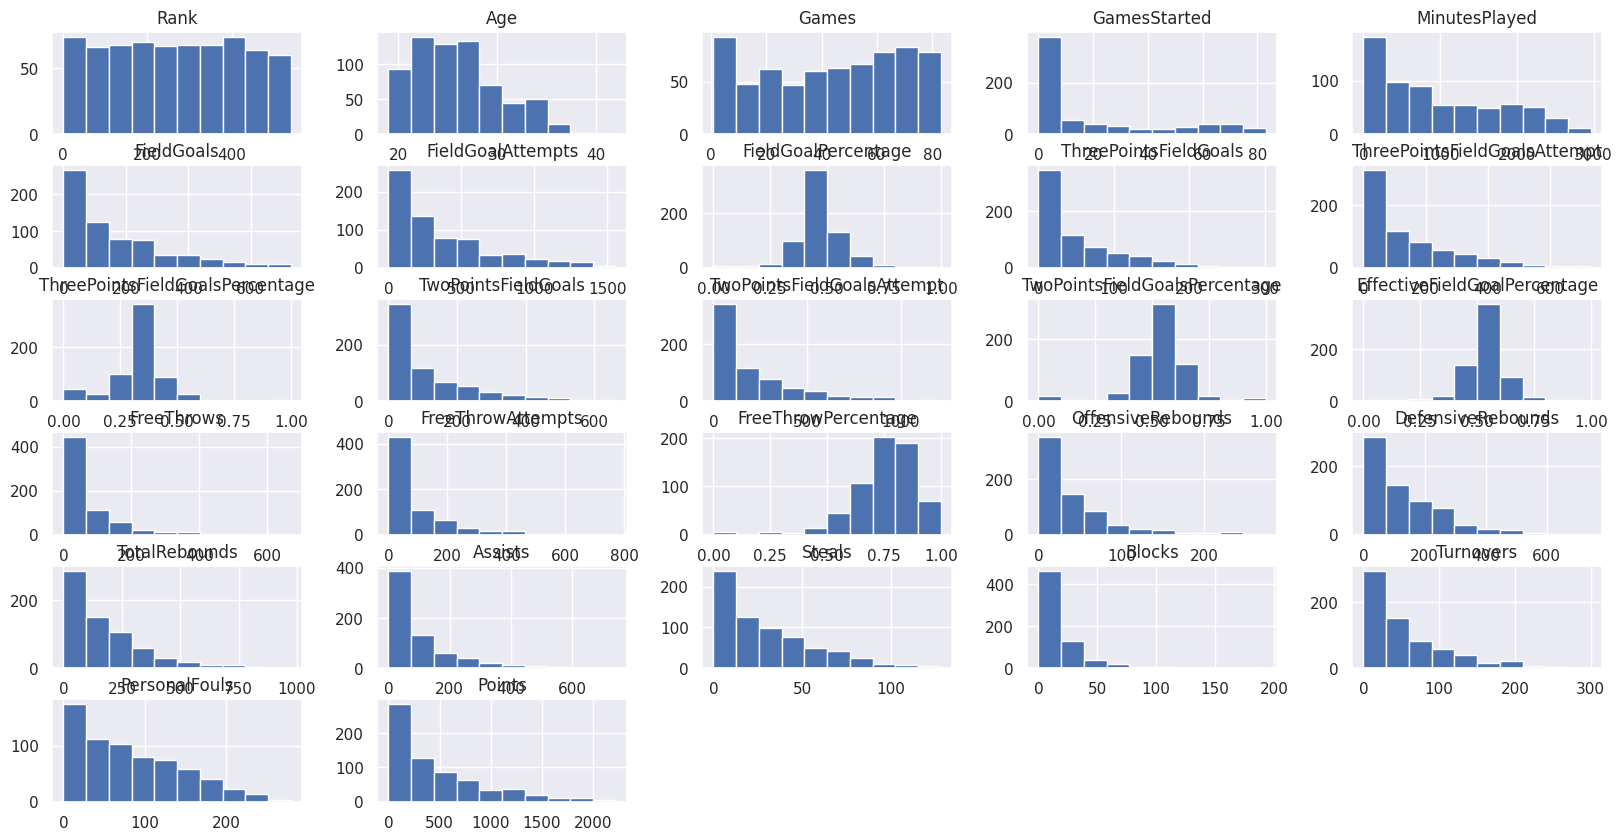

In [ ]:
_ = nba_data.hist(figsize=(20,10))

Let's look at an even smaller slice of the stats to get a sense of the top players.

In [ ]:
nba_data.sort_values(by="Points", ascending=False)[["Player","Games","MinutesPlayed","ThreePointsFieldGoalsPercentage","TwoPointsFieldGoalsPercentage","FreeThrowPercentage"]].head(10)

,Player,Games,MinutesPlayed,ThreePointsFieldGoalsPercentage,TwoPointsFieldGoalsPercentage,FreeThrowPercentage
590,Jayson Tatum,74,2732,0.350,0.558,0.854
184,Joel Embiid,66,2284,0.330,0.587,0.857
160,Luka Dončić,66,2391,0.342,0.588,0.742
209,Shai Gilgeous-Alexander,68,2416,0.345,0.533,0.905
12,Giannis Antetokounmpo,63,2024,0.275,0.596,0.645
179,Anthony Edwards,79,2842,0.369,0.513,0.756
514,Julius Randle,77,2737,0.343,0.553,0.757
427,Donovan Mitchell,68,2432,0.386,0.566,0.867
675,Trae Young,73,2541,0.335,0.476,0.886
360,Zach LaVine,77,2768,0.375,0.556,0.848


Let's model Free Throw % using (Three Point %, Two Point %, Minutes Played, and Games Played)

In [ ]:
lm_nba = smf.ols(formula='FreeThrowPercentage ~ ThreePointsFieldGoalsPercentage + TwoPointsFieldGoalsPercentage + MinutesPlayed + Games', data=nba_data).fit()

# print the coefficients & r2 value
print(lm_nba.params)
print("R2=" + str(lm_nba.rsquared))
lm_nba.summary()

Intercept                          0.772734
ThreePointsFieldGoalsPercentage    0.135932
TwoPointsFieldGoalsPercentage     -0.151231
MinutesPlayed                      0.000055
Games                             -0.000790
dtype: float64
R2=0.07292828249604622


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     FreeThrowPercentage   R-squared:                       0.073
Model:                             OLS   Adj. R-squared:                  0.067
Method:                  Least Squares   F-statistic:                     12.17
Date:                 Mon, 16 Oct 2023   Prob (F-statistic):           1.56e-09
Time:                         03:36:26   Log-Likelihood:                 367.31
No. Observations:                  624   AIC:                            -724.6
Df Residuals:                      619   BIC:                            -702.4
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.7727      0.034     22.631      0.000       0.706       0.840
ThreePointsFieldGoalsPercentage     0.1359      0.045      3.009      0.003       0.047       0.225
TwoPointsFieldGoalsPercentage      -0.1512      0.052     -2.921      0.004      -0.253      -0.050
MinutesPlayed                    5.513e-05   1.43e-05      3.855      0.000     2.7e-05    8.32e-05
Games                              -0.0008      0.000     -1.640      0.102      -0.002       0.000
==============================================================================
Omnibus:                      161.299   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.709
Skew:                          -1.096   Prob(JB):                    4.28e-158
Kurtosis:                       7.803   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dummy Variables
Now let's try to model Free Throw Percentage using Three Point %, which worked well last time, and Position.

Because Position is a categorical variable with several possible values (n=5), this is actually equivalent to creating a set of n-1 new binary variables.

In [ ]:
# Filter to remove players who played multiple positions
nba_pos_data = nba_data.sort_values(by="Points", ascending=False)[["Player","Position","ThreePointsFieldGoalsPercentage","FreeThrowPercentage"]]
nba_pos_data = nba_pos_data[(nba_pos_data["Position"] == "SG") | (nba_pos_data["Position"] == "PG") | (nba_pos_data["Position"] == "SF") | (nba_pos_data["Position"] == "PF") | (nba_pos_data["Position"] == "C")]
nba_pos_data.head()

,Player,Position,ThreePointsFieldGoalsPercentage,FreeThrowPercentage
590,Jayson Tatum,SF,0.350,0.854
184,Joel Embiid,C,0.330,0.857
160,Luka Dončić,PG,0.342,0.742
209,Shai Gilgeous-Alexander,PG,0.345,0.905
12,Giannis Antetokounmpo,PF,0.275,0.645


Now lets fit a model by position:

In [ ]:
lm_nba_pos = smf.ols(formula='FreeThrowPercentage ~ ThreePointsFieldGoalsPercentage + Position', data=nba_pos_data).fit()

# print the coefficients
print(lm_nba_pos.params)
lm_nba_pos.summary()

Intercept                          0.673345
Position[T.PF]                     0.038011
Position[T.PG]                     0.057689
Position[T.SF]                     0.059114
Position[T.SG]                     0.079935
ThreePointsFieldGoalsPercentage    0.110596
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     FreeThrowPercentage   R-squared:                       0.056
Model:                             OLS   Adj. R-squared:                  0.048
Method:                  Least Squares   F-statistic:                     7.194
Date:                 Mon, 16 Oct 2023   Prob (F-statistic):           1.48e-06
Time:                         03:36:26   Log-Likelihood:                 352.93
No. Observations:                  616   AIC:                            -693.9
Df Residuals:                      610   BIC:                            -667.3
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.6733      0.018     36.837      0.000       0.637       0.709
Position[T.PF]                      0.0380      0.018      2.134      0.033       0.003       0.073
Position[T.PG]                      0.0577      0.018      3.153      0.002       0.022       0.094
Position[T.SF]                      0.0591      0.018      3.307      0.001       0.024       0.094
Position[T.SG]                      0.0799      0.017      4.740      0.000       0.047       0.113
ThreePointsFieldGoalsPercentage     0.1106      0.046      2.394      0.017       0.020       0.201
==============================================================================
Omnibus:                      216.285   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1063.388
Skew:                          -1.502   Prob(JB):                    1.23e-231
Kurtosis:                       8.692   Cond. No.                         9.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Datathon Questions

## Question 1
Which two player statistics appear to be the most positively correlated with one another? Which two are most negatively correlated?

What if you only consider top players who played more than 1500 minutes?

What if you look at each position independently?

In [ ]:
def correlation_heatmap(correlation, title='', max=1.0):

    # present values in heatmap
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.heatmap(correlation, center=0, vmax=max, vmin=-0.6, cmap='vlag').set(title=title)

<ipython-input-26-3178c725f7d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  initial_correlation = nba_data.corr()
<ipython-input-26-3178c725f7d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_nba_data.loc["AggCorr"] = initial_correlation.mean()
<ipython-input-26-3178c725f7d4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ordered_nba_data.corr()


                                 FieldGoals    Points  MinutesPlayed  \
FieldGoals                         1.000000  0.994333       0.921238   
Points                             0.994333  1.000000       0.914472   
MinutesPlayed                      0.921238  0.914472       1.000000   
FieldGoalAttempts                  0.986308  0.989328       0.924792   
TwoPointsFieldGoals                0.957680  0.936440       0.845200   
TwoPointsFieldGoalsAttempt         0.966720  0.951224       0.859724   
Turnovers                          0.922096  0.921776       0.868249   
DefensiveRebounds                  0.834465  0.807399       0.846769   
PersonalFouls                      0.794785  0.776272       0.901168   
GamesStarted                       0.849549  0.839730       0.881451   
FreeThrowAttempts                  0.895024  0.916147       0.772246   
TotalRebounds                      0.787942  0.754511       0.812963   
FreeThrows                         0.891326  0.919245       0.76

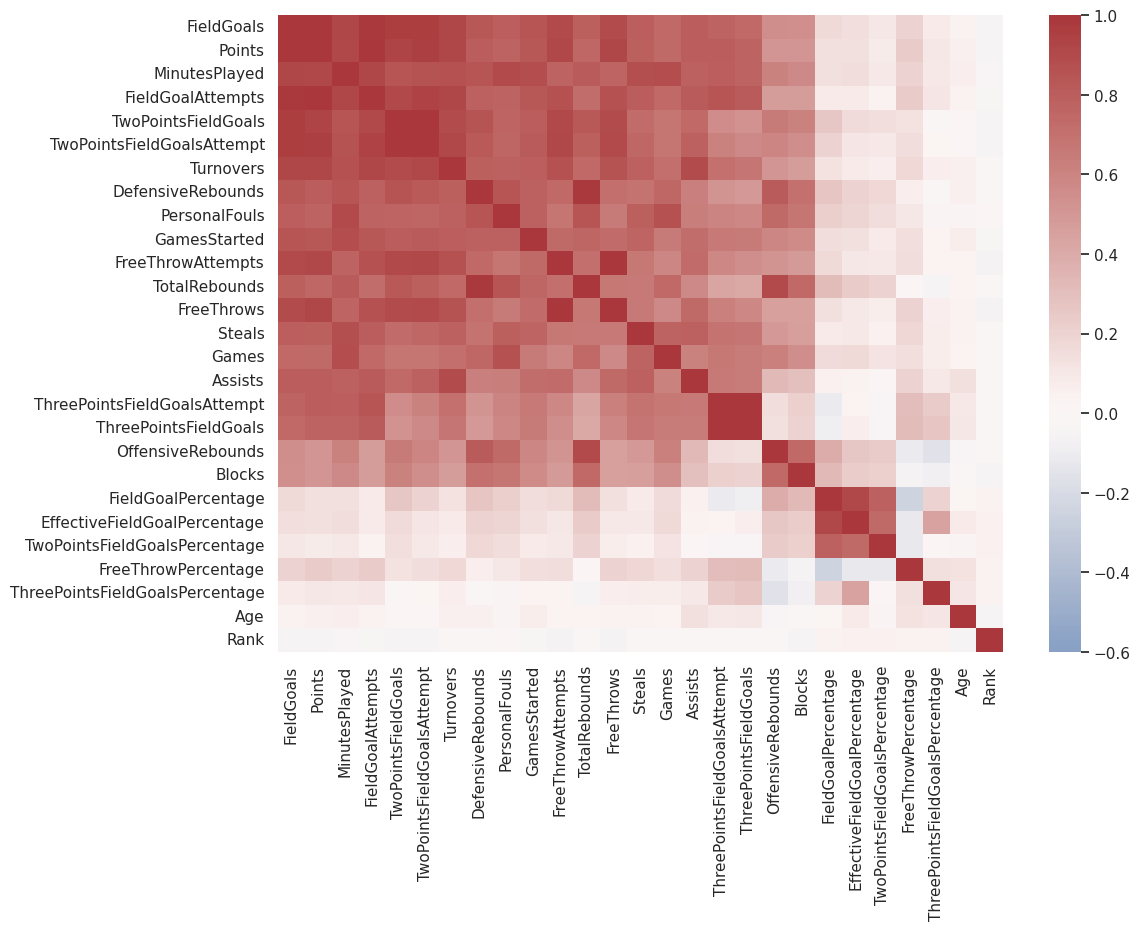

In [ ]:
# order by correlation data
initial_correlation = nba_data.corr()
ordered_nba_data = nba_data
ordered_nba_data.loc["AggCorr"] = initial_correlation.mean()
ordered_nba_data = ordered_nba_data.sort_values(by="AggCorr", axis=1, ascending=False)
ordered_nba_data = ordered_nba_data.drop("AggCorr")
correlation = ordered_nba_data.corr()

correlation_heatmap(correlation)

# identify min/max
# min = correlation.min()
# print(min)
print(correlation)
# 0.994333 FieldGoals/Points
# -0.251563 FieldGoalPercentage/FreeThrowPercentage


<ipython-input-27-fdb6d9d9b68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_correlation = top_nba_data.corr()


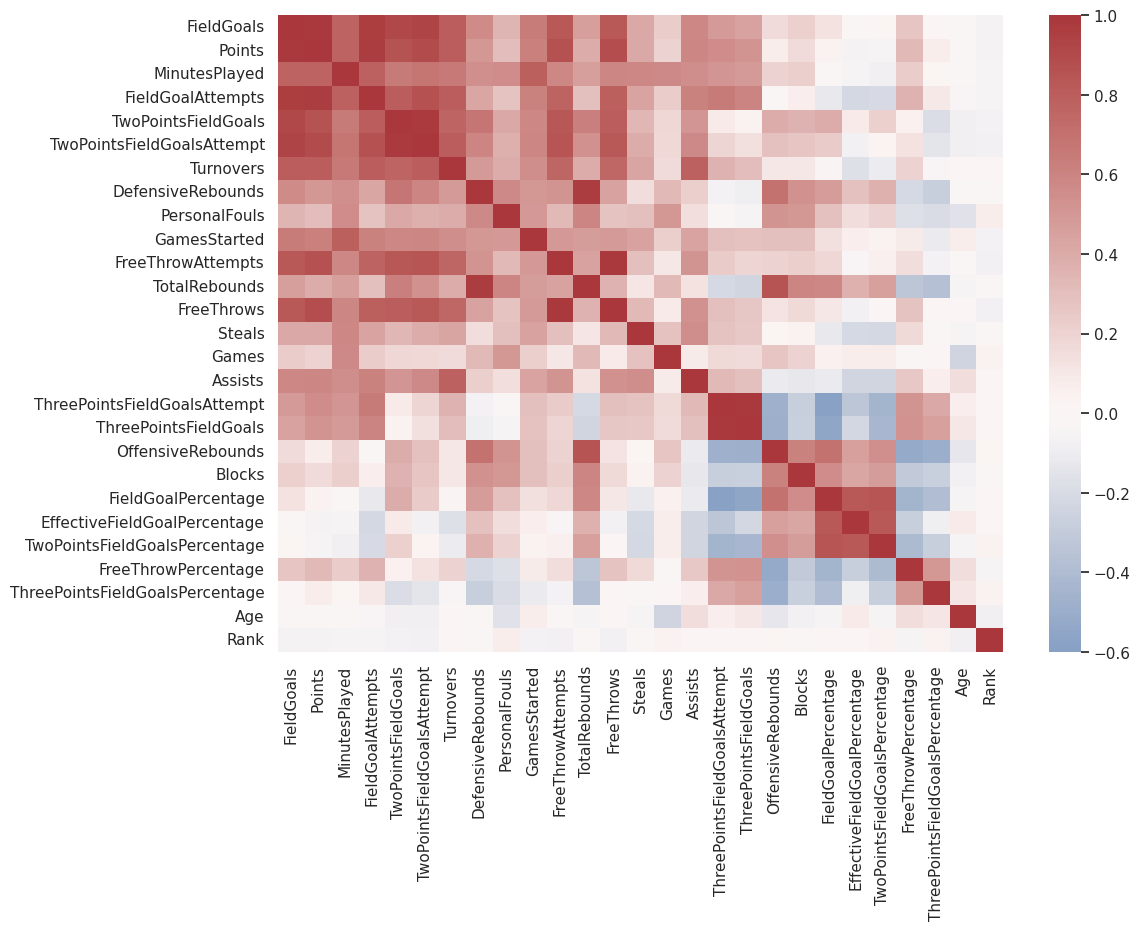

In [ ]:
top_nba_data = ordered_nba_data.loc[(nba_data['MinutesPlayed'] > 1000)]
top_correlation = top_nba_data.corr()
# -0.591995 ThreePointsFieldGoalsAttempt/FieldGoalPercentage
# 0.985069 ThreePointsFieldGoalsAttempt/ThreePointsFieldGoals
correlation_heatmap(top_correlation)

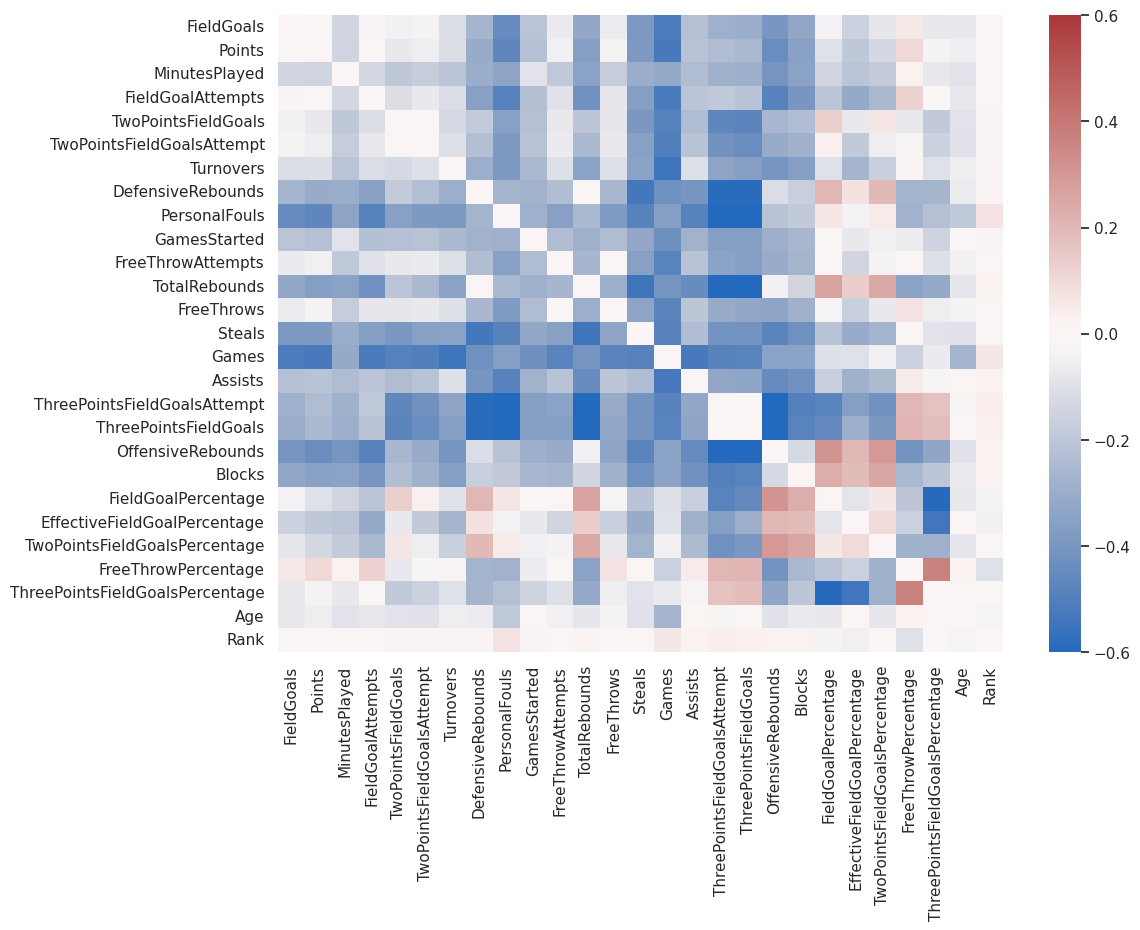

In [ ]:
difference = top_correlation - correlation
correlation_heatmap(difference, max=0.6)

['C' 'SG' 'PF' 'PG' 'SF' 'SG-PG' 'SF-SG' 'PG-SG' 'SF-PF' 'PF-C' 'PF-SF']


<ipython-input-29-730ddfe21c17>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_corr = C_data.corr()
<ipython-input-29-730ddfe21c17>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SG_corr = SG_data.corr()
<ipython-input-29-730ddfe21c17>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SF_corr = SF_data.corr()
<ipython-input-29-730ddfe21c17>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False.

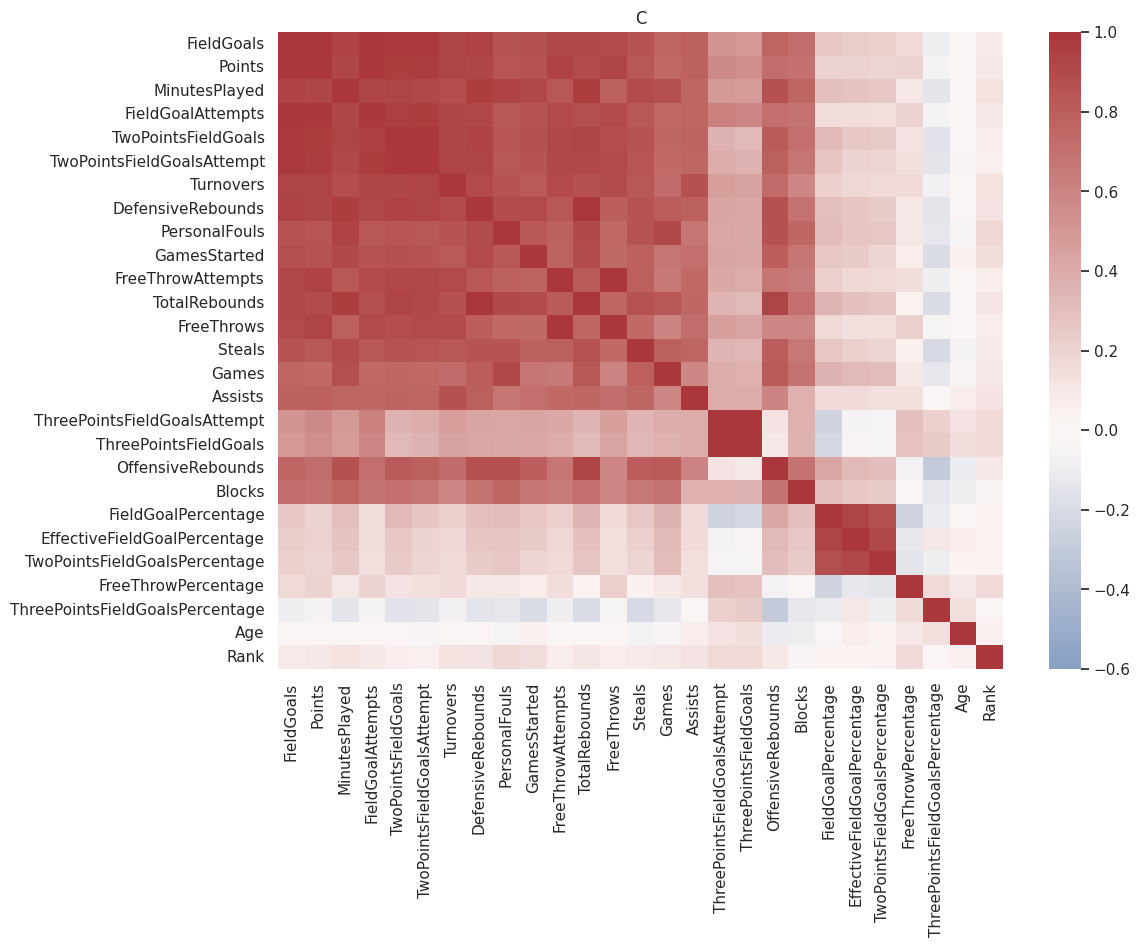

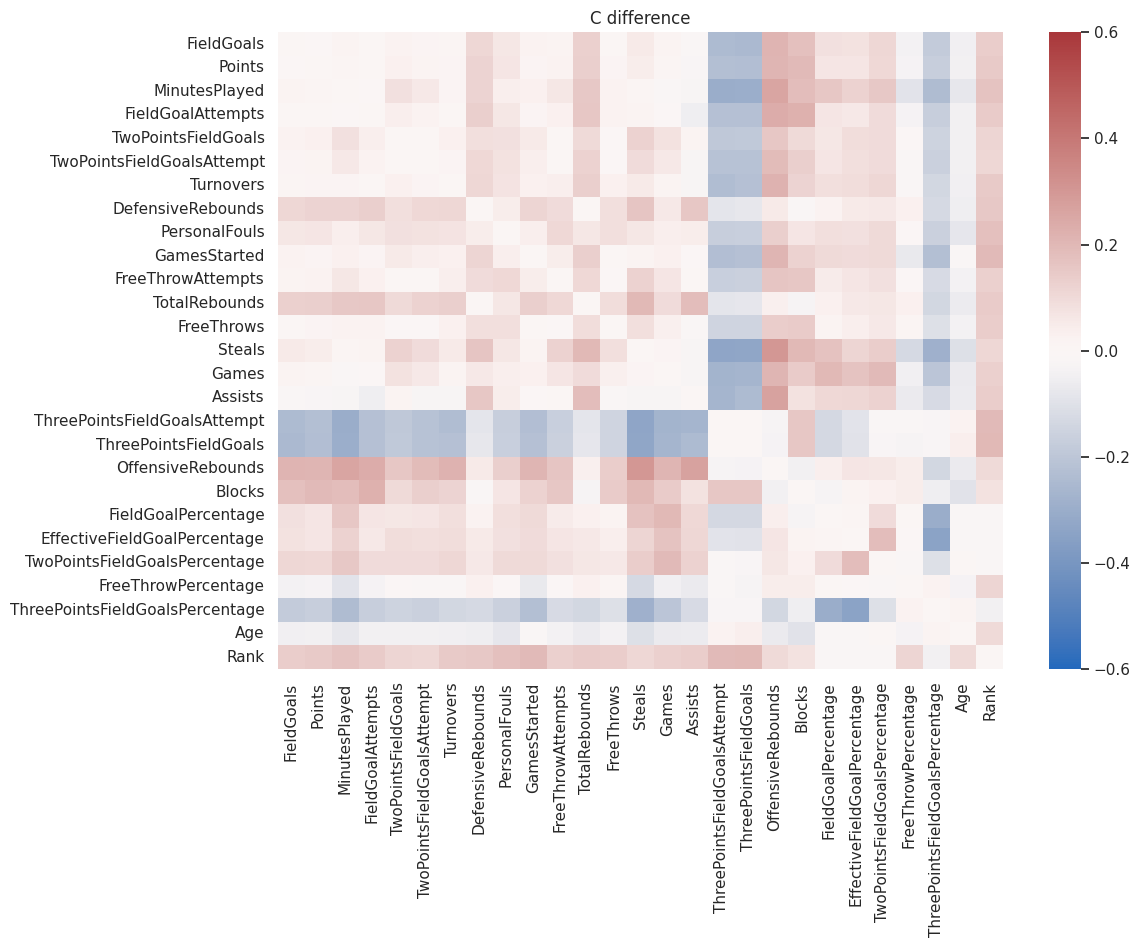

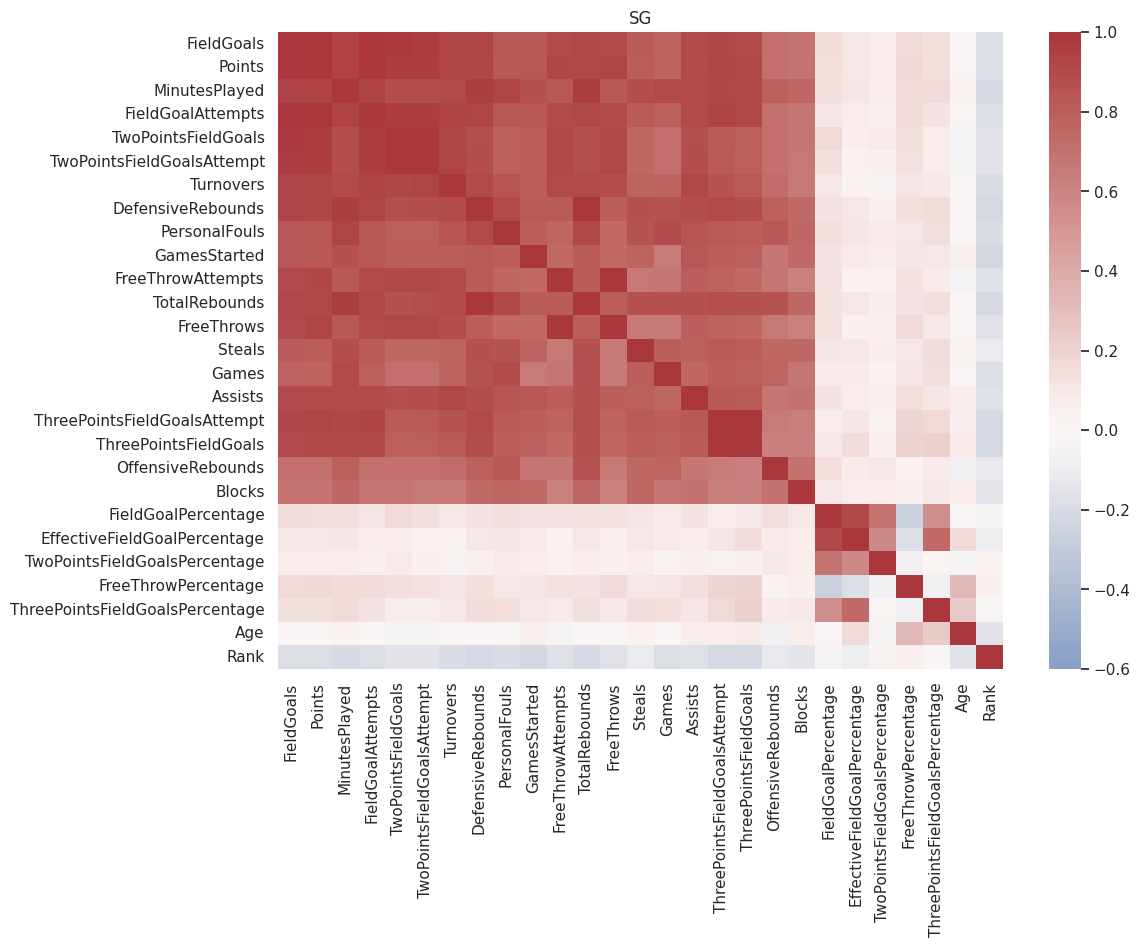

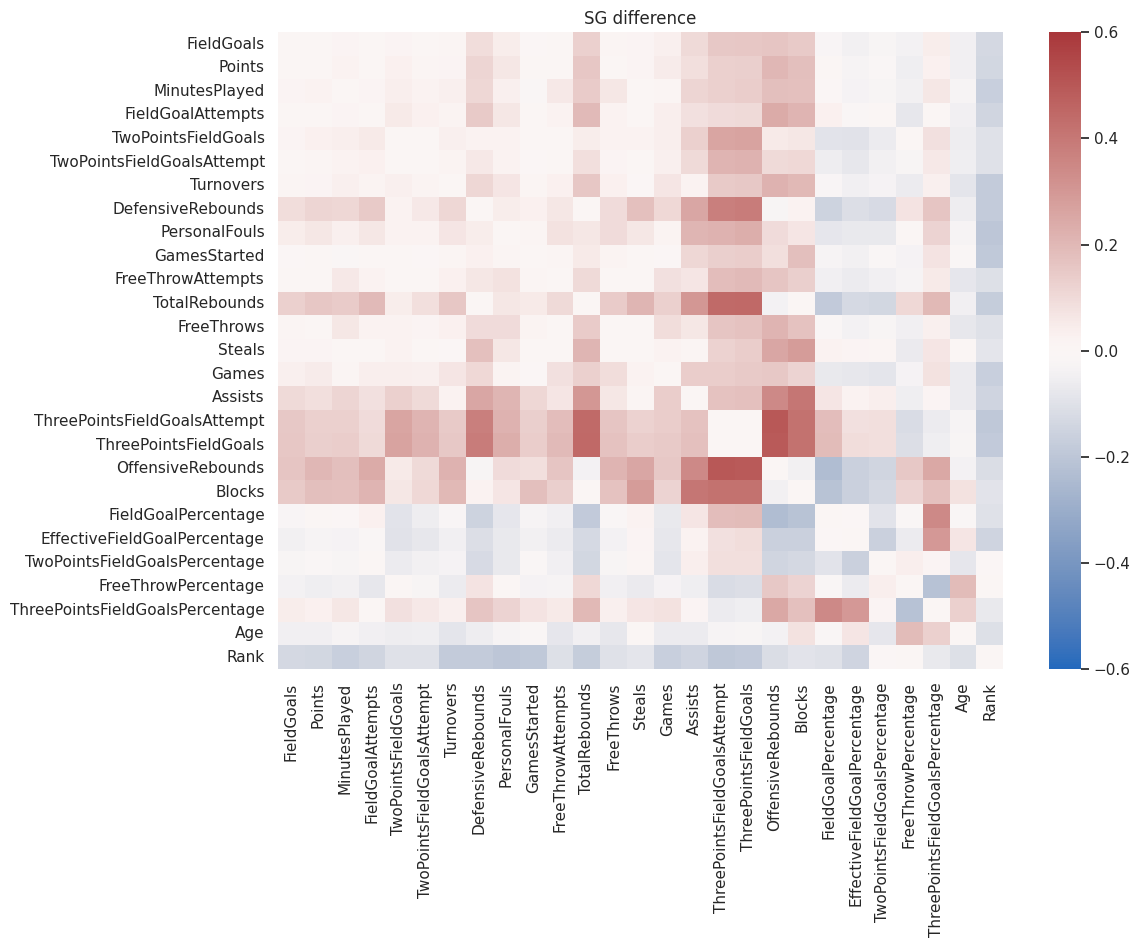

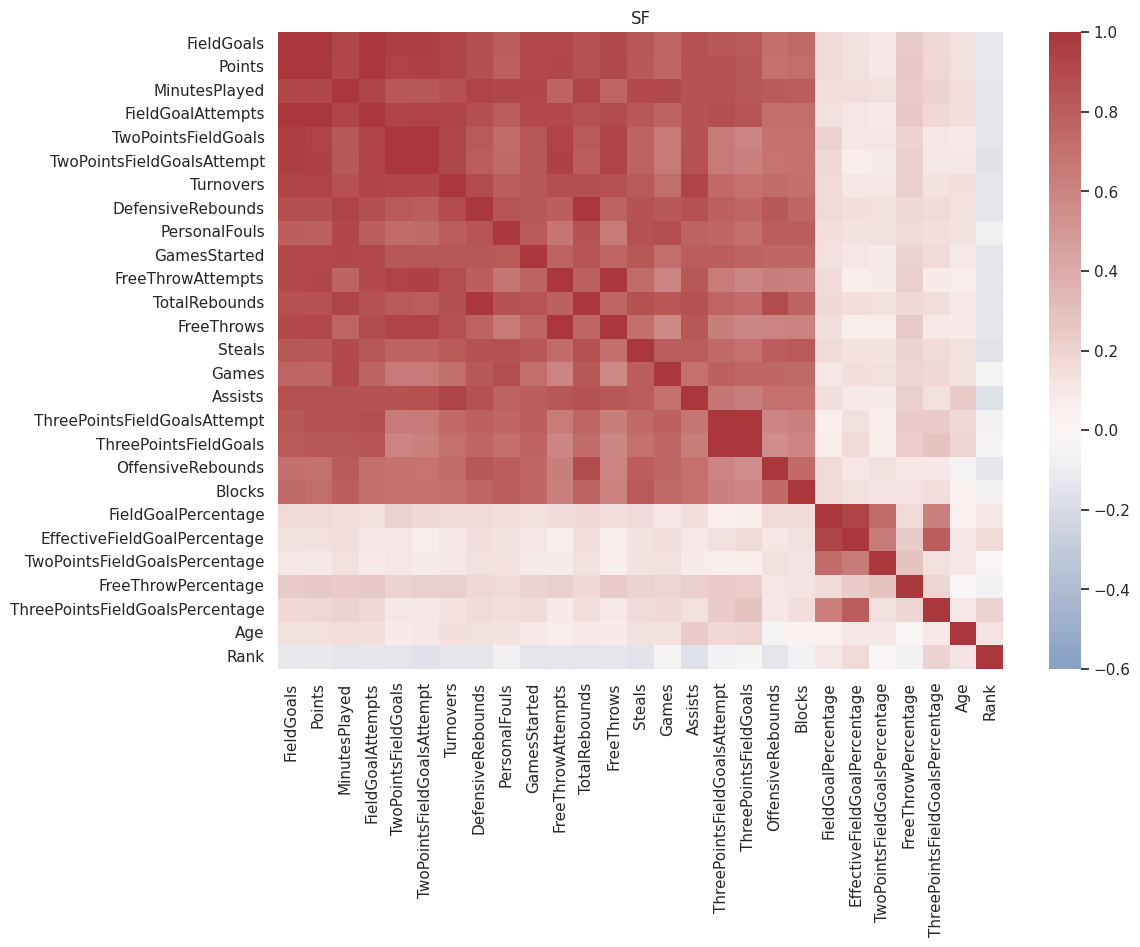

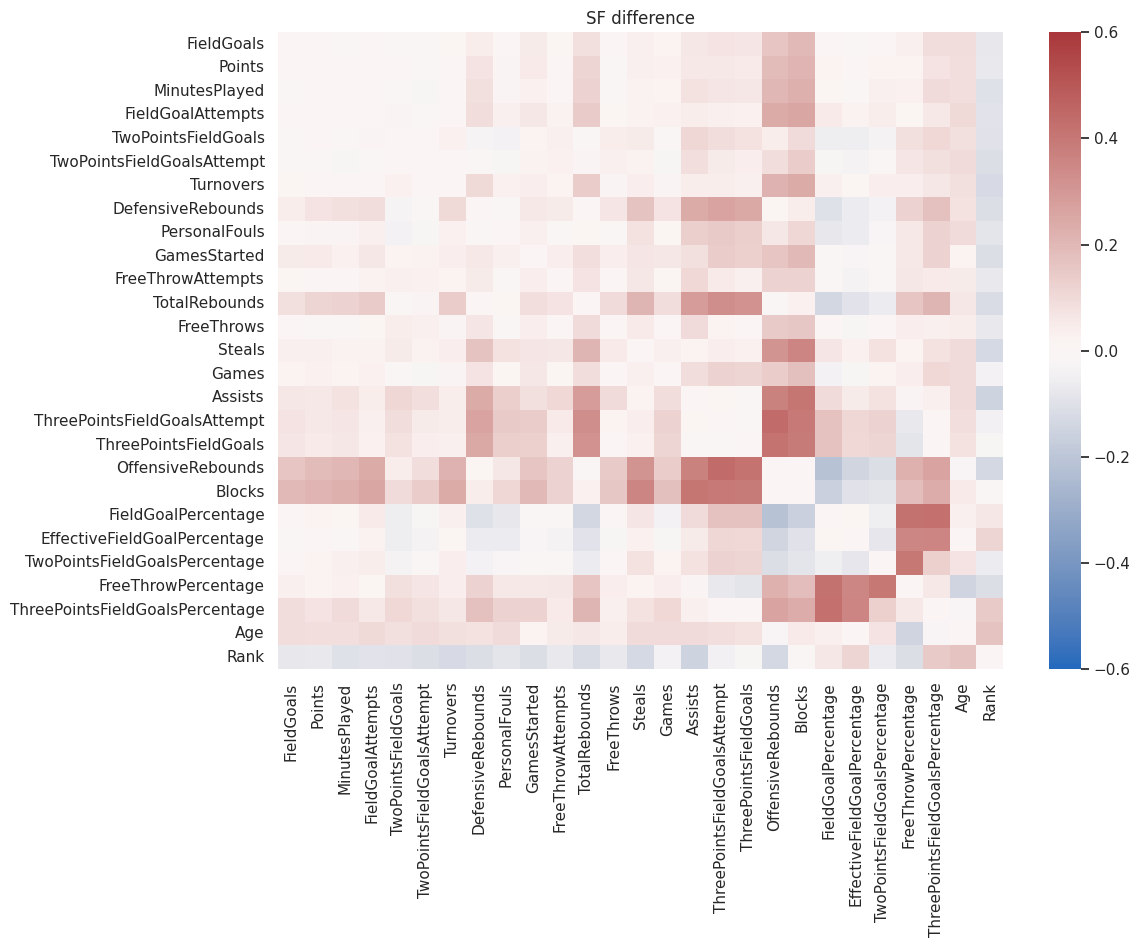

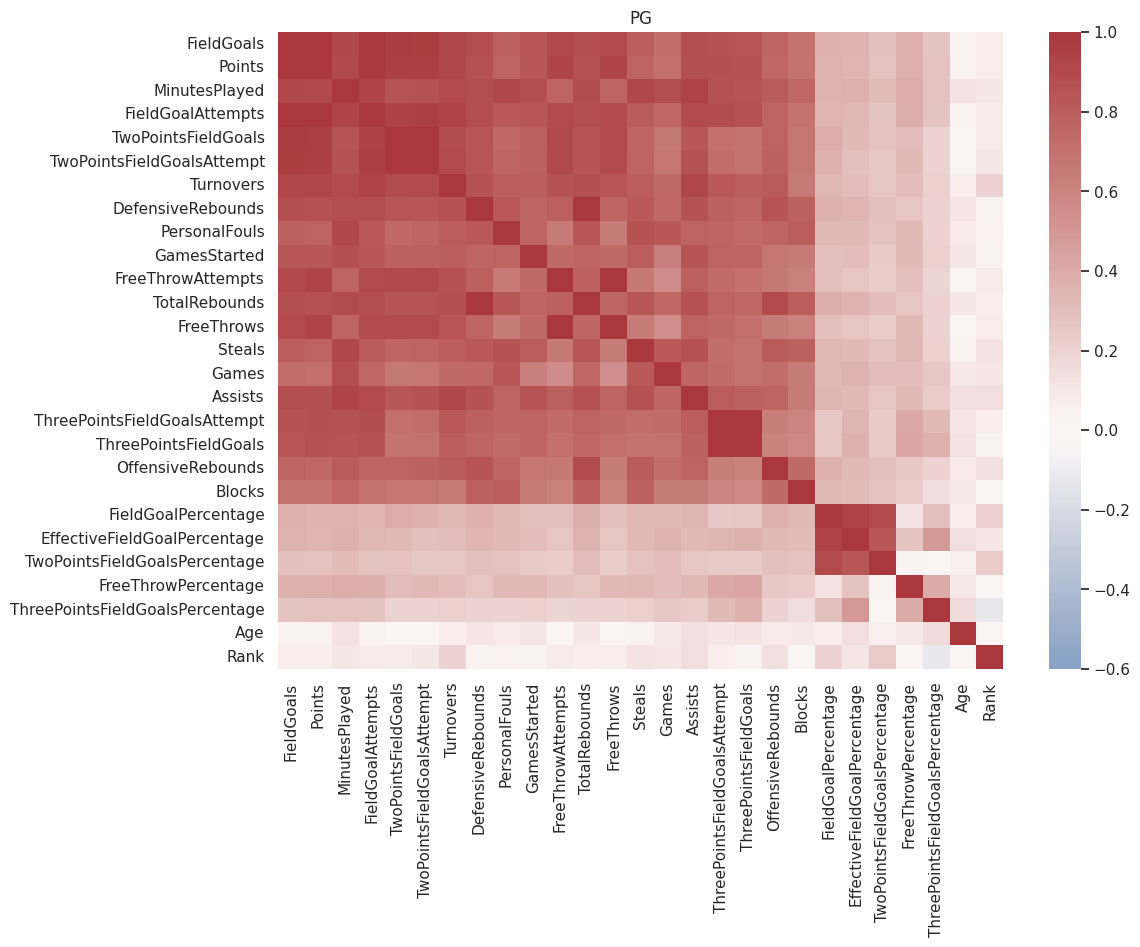

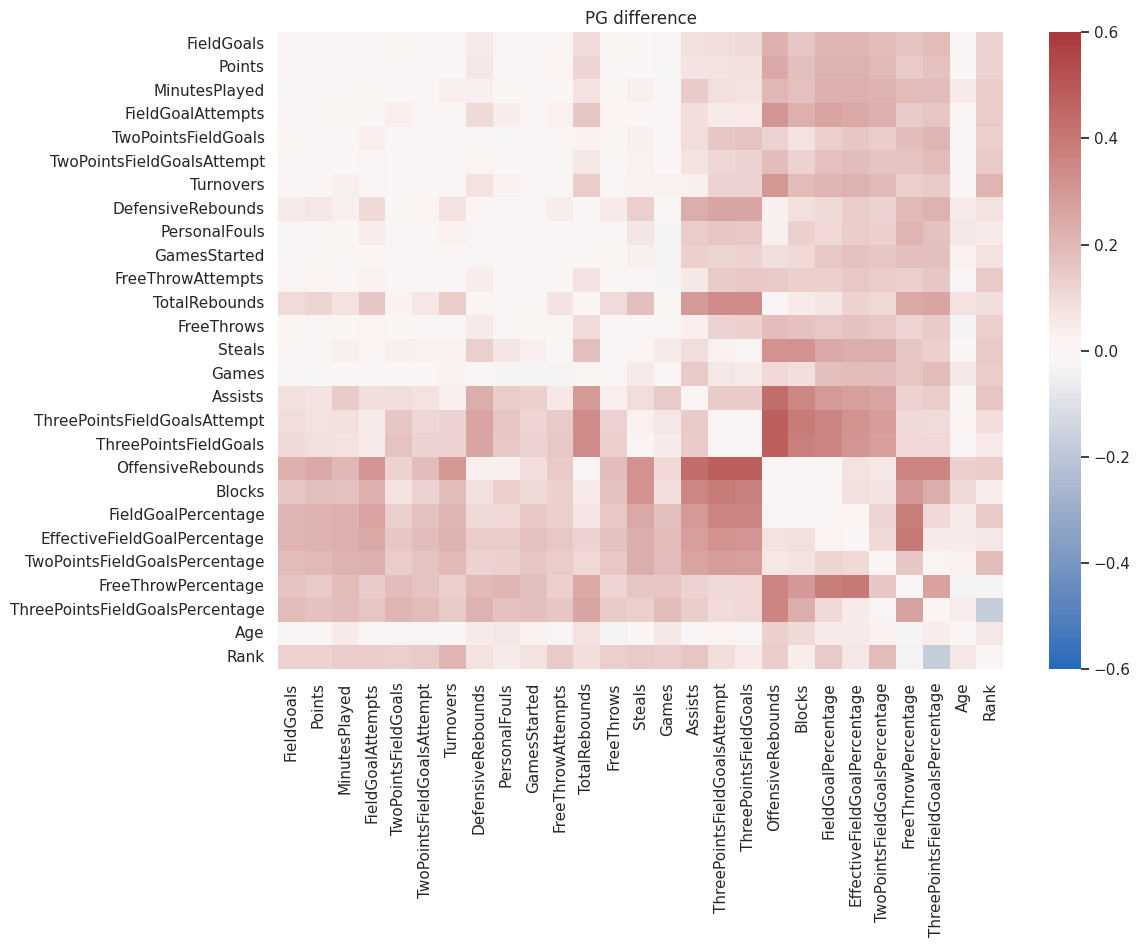

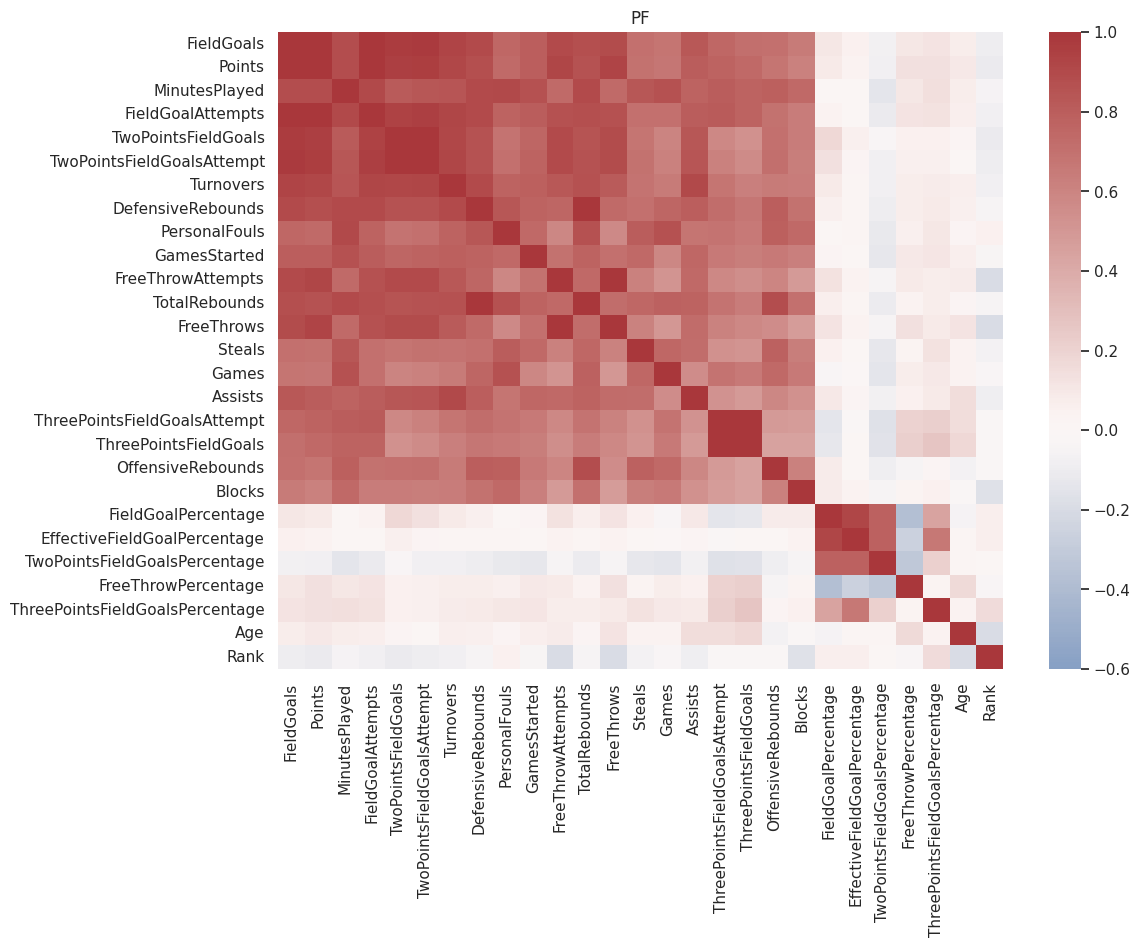

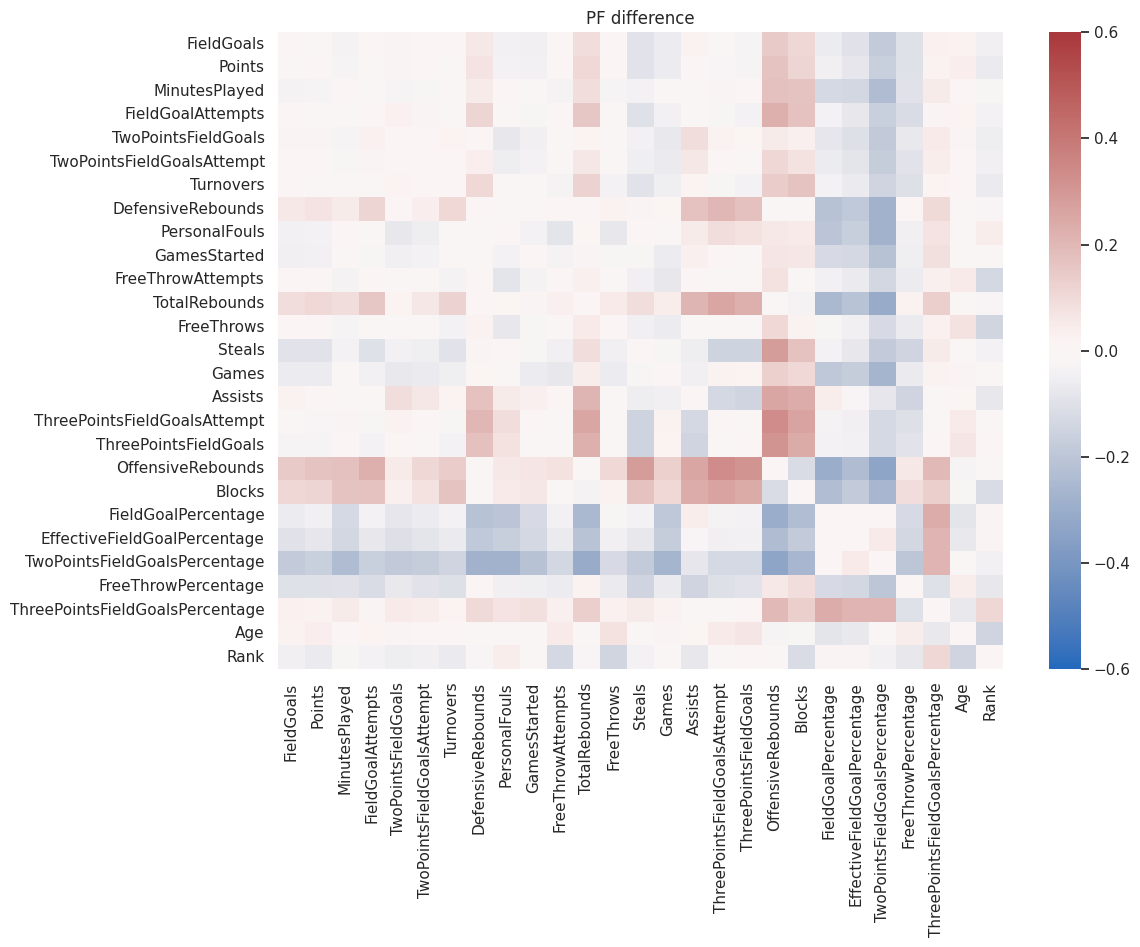

In [ ]:
print(ordered_nba_data["Position"].unique())
C_data = ordered_nba_data.loc[(ordered_nba_data['Position'] == 'C') | (ordered_nba_data['Position'] == 'PF-C')]
SG_data = ordered_nba_data.loc[(ordered_nba_data['Position'] == 'SG') | (ordered_nba_data['Position'] == 'SG-PG') | (ordered_nba_data['Position'] == 'SF-SG') | (ordered_nba_data['Position'] == 'PG-SG')]
PF_data = ordered_nba_data.loc[(ordered_nba_data['Position'] == 'PF') | (ordered_nba_data['Position'] == 'SF-PF') | (ordered_nba_data['Position'] == 'PF-C') | (ordered_nba_data['Position'] == 'PF-SF')]
PG_data = ordered_nba_data.loc[(ordered_nba_data['Position'] == 'PG') | (ordered_nba_data['Position'] == 'SG-PG') | (ordered_nba_data['Position'] == 'PG-SG')]
SF_data = ordered_nba_data.loc[(ordered_nba_data['Position'] == 'SF') | (ordered_nba_data['Position'] == 'SF-SG') | (ordered_nba_data['Position'] == 'SF-PF') | (ordered_nba_data['Position'] == 'PF-SF')]

C_corr = C_data.corr()
SG_corr = SG_data.corr()
SF_corr = SF_data.corr()
PG_corr = PG_data.corr()
PF_corr = PF_data.corr()
position_corrs = {
    "C":C_corr, "SG":SG_corr, "SF":SF_corr, "PG":PG_corr, "PF":PF_corr,
}

i = 0
for key, position_corr in position_corrs.items():
  # for other_key, other_corr in position_corrs.items():
  difference = position_corr-correlation
  plt.figure(i) # need to change figure number for distinct charts
  i += 1
  correlation_heatmap(position_corr, title=key)
  plt.figure(i) # need to change figure number for distinct charts
  i += 1
  correlation_heatmap(difference, title=f'{key} difference', max=0.6)
  # big_difference = difference.loc[(difference.max() > 0.2) | (difference.min() < -0.2)]
  # big_difference = big_difference.filter(big_difference.index)
  # # print()
  # if not big_difference.empty:
  #   plt.figure(i) # need to change figure number for distinct charts
  #   i += 1
  #   correlation_heatmap(big_difference, title=key)


## Question 2

Build a multiple linear regression model using this year's data that predicts a player's total points per minute played (PPM) based on their other stats.
**In your best model, which variables are the strongest predictors?**

In [ ]:
_ = pd.plotting.scatter_matrix(ordered_nba_data, figsize=(8,8))

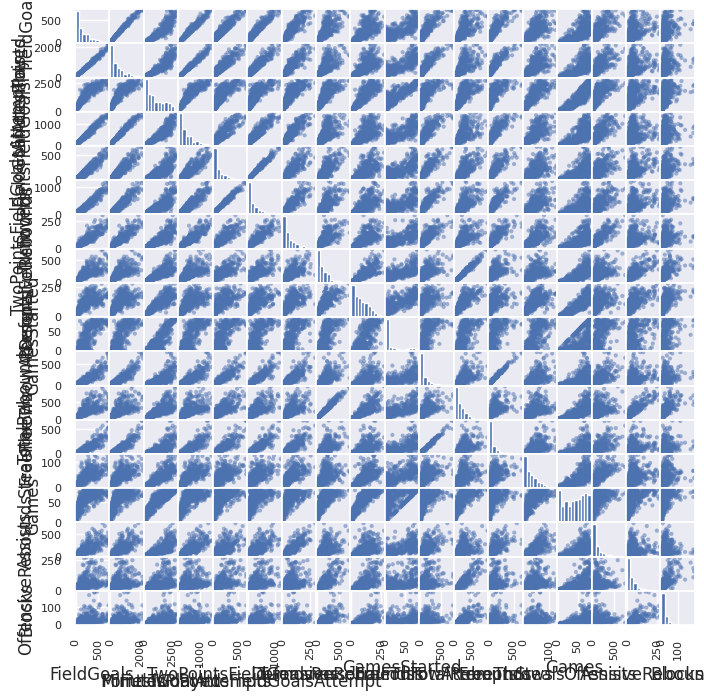

In [ ]:
filtered_nba_data = ordered_nba_data.drop(
    ['Age', 'Rank', 'TwoPointsFieldGoalsPercentage', 'ThreePointsFieldGoalsPercentage', 'FieldGoalPercentage', 'EffectiveFieldGoalPercentage', 'FreeThrowPercentage',
     'ThreePointsFieldGoalsAttempt', 'ThreePointsFieldGoals'],
    axis=1,
)
_ = pd.plotting.scatter_matrix(filtered_nba_data, figsize=(8,8))

# order columns by average correlation
# correlation = nba_data.corr()
# nba_data.loc["AggCorr"] = correlation.mean()
# nba_data = nba_data.sort_values(by="AggCorr", axis=1, ascending=False)
# nba_data = nba_data.drop("AggCorr")

Then try using the model that you created using this year's data to predict 2023 MVP candidates Nikola Jokic and Joel Embiid's PPM numbers *for last year's season* (2021-2022) which we've included in the file below. (You'll notice it doesn't contain a "points" column).

**How close are you able to get to their actual 2021-22 PPMs?**
<ul><li>Nikola: 2004 Points / 2476 Minutes = 0.80936995153
<li>Joel: 2079 Points / 2297 Minutes = 0.90509360034</ul>


_[a bonus✔️+ to the team who builds the model that gives the best prediction.]_

In [ ]:
nba_mvp_url = 'https://drive.google.com/uc?export=download&id=109P1x8Eo4EZkcl-xbhFuPF-RFyFshYqV' #←"NBA 2021-22 Stats for these two players.csv"
nba_mvp_raw = pd.read_csv(nba_mvp_url)
nba_mvp = nba_mvp_raw[important_cols[:-1]]
nba_mvp

,Rank,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,FieldGoals,FieldGoalAttempts,...,FreeThrowAttempts,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls
0,290,Nikola Jokić,C,26,DEN,74,74,2476,764,1311,...,468,0.810,206,813,1019,584,109,63,281,191
1,162,Joel Embiid,C,27,PHI,68,68,2297,666,1334,...,803,0.814,146,650,796,284,77,99,214,181


In [ ]:
# # consider a few options for the mulitple linear regression
# model_options = pd.DataFrame.from_dict({
#     "FieldGoals": 0,
#     "TwoPointsFieldGoals": 0,
#     "FreeThrows": 0,
#     "FieldGoals + TwoPointsFieldGoals": 0,
#     "FieldGoals + FreeThrows": 0,
#     "TwoPointsFieldGoals + FreeThrows": 0,
#     "FieldGoals + TwoPointsFieldGoals + FreeThrows": 0,
# }, orient='index', columns=['rsquared'])

# for combo in model_options.index:
#   # create a fitted model
#   mlm = smf.ols(formula='Points ~ ' + combo, data=nba_data).fit()
#   model_options.loc[combo] = mlm.rsquared

# # visualize rsquared
# model_options = model_options.sort_values(by='rsquared')
# print(model_options)
# sns.barplot(x=model_options['rsquared'], y=model_options.index)

# # use best result for prediction
# best_mlm = smf.ols(formula='Points ~ ' + model_options.index[-1], data=nba_data).fit()
# print("\nPredictions for MVP Points:")
# print(best_mlm.predict(nba_mvp))

In [ ]:
# best_mlm = smf.ols(formula='Points ~ FieldGoals + TwoPointsFieldGoals + FreeThrows', data=nba_data).fit()
# print("\nPredictions for MVP Points:")
# print(best_mlm.predict(nba_mvp))
# best_mlm.summary()

In [ ]:
nba_data['PPM'] = nba_data['Points'] / nba_data['MinutesPlayed']

# # consider a few options for the mulitple linear regression
# model_options = pd.DataFrame.from_dict({
#     "MinutesPlayed": 0,
#     "FieldGoals": 0,
#     "TwoPointsFieldGoals": 0,
#     "FreeThrows": 0,
#     "FieldGoals + TwoPointsFieldGoals": 0,
#     "FieldGoals + FreeThrows": 0,
#     "TwoPointsFieldGoals + FreeThrows": 0,
#     "FieldGoals + TwoPointsFieldGoals + FreeThrows": 0,
#     "FieldGoals + TwoPointsFieldGoals + FreeThrows + MinutesPlayed": 0,
# }, orient='index', columns=['rsquared'])

# for combo in model_options.index:
#   # create a fitted model
#   mlm = smf.ols(formula='PPM ~ ' + combo, data=nba_data).fit()
#   model_options.loc[combo] = mlm.rsquared

# # visualize rsquared
# model_options = model_options.sort_values(by='rsquared')
# print(model_options)
# sns.barplot(x=model_options['rsquared'], y=model_options.index)

# # use best result for prediction
# best_mlm = smf.ols(formula='Points ~ ' + model_options.index[-1], data=nba_data).fit()
# print("\nPredictions for MVP Points:")
# print(best_mlm.predict(nba_mvp))


# ##
# print(nba_data.head())
# best_mlm = smf.ols(formula='PPM ~ MinutesPlayed + FieldGoals + TwoPointsFieldGoals + FreeThrows', data=nba_data).fit()
# print("\nPredictions for MVP Points:")
# print(best_mlm.predict(nba_mvp))
# best_mlm.summary()

<ipython-input-39-f64fa7f2882a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_data['PPM'] = nba_data['Points'] / nba_data['MinutesPlayed']


In [ ]:
# # create a fitted model
# mlm = smf.ols(formula='PPM ~ MinutesPlayed + FieldGoals + TwoPointsFieldGoals + FreeThrows + FieldGoalAttempts + GamesStarted', data=nba_data).fit()
# print(f'r2 {mlm.rsquared}')


# HEY GANG LOOK HERE THIS IS THE GOOD ONE

I'm iterating through various combinations to find the best predictions, and making a visualization of all the attempts

I sort by the absolute value of the difference from the actual values, so the *last combination of features is best*

<ipython-input-45-765464c38d8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_data['Center'] = (nba_data['Position'] == 'C') | (nba_data['Position'] == 'PF-C')


[(), ('FreeThrowPercentage',), ('TotalRebounds',), ('Games',), ('Assists',), ('DefensiveRebounds',), ('FreeThrowPercentage', 'TotalRebounds'), ('FreeThrowPercentage', 'Games'), ('FreeThrowPercentage', 'Assists'), ('FreeThrowPercentage', 'DefensiveRebounds'), ('TotalRebounds', 'Games'), ('TotalRebounds', 'Assists'), ('TotalRebounds', 'DefensiveRebounds'), ('Games', 'Assists'), ('Games', 'DefensiveRebounds'), ('Assists', 'DefensiveRebounds'), ('FreeThrowPercentage', 'TotalRebounds', 'Games'), ('FreeThrowPercentage', 'TotalRebounds', 'Assists'), ('FreeThrowPercentage', 'TotalRebounds', 'DefensiveRebounds'), ('FreeThrowPercentage', 'Games', 'Assists'), ('FreeThrowPercentage', 'Games', 'DefensiveRebounds'), ('FreeThrowPercentage', 'Assists', 'DefensiveRebounds'), ('TotalRebounds', 'Games', 'Assists'), ('TotalRebounds', 'Games', 'DefensiveRebounds'), ('TotalRebounds', 'Assists', 'DefensiveRebounds'), ('Games', 'Assists', 'DefensiveRebounds'), ('FreeThrowPercentage', 'TotalRebounds', 'Games',

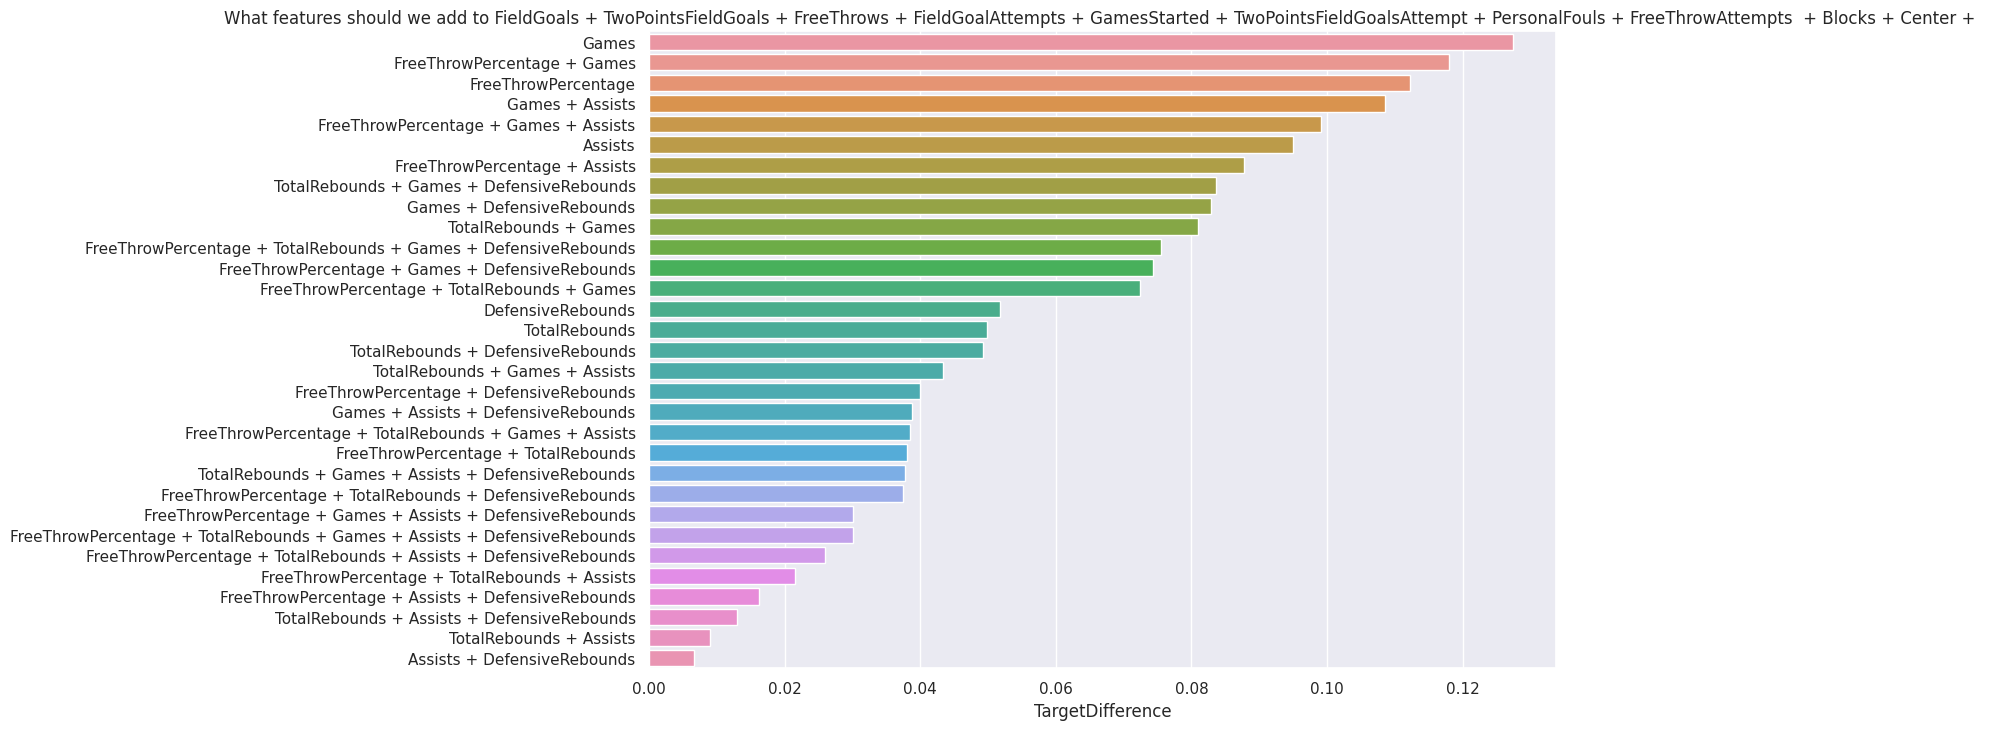

In [ ]:
# add center as a boolean column in the data based on position
nba_data['Center'] = (nba_data['Position'] == 'C') | (nba_data['Position'] == 'PF-C')
nba_mvp['Center'] = (nba_mvp['Position'] == 'C') | (nba_mvp['Position'] == 'PF-C')

# identify a bunch of combination options for features
from itertools import combinations
options = [ #'MinutesPlayed',
       'FreeThrowPercentage', 'TotalRebounds', 'Games', 'Assists', 'DefensiveRebounds']
# unused 'Position', 'Player', 'Rank', 'Age', 'Team', 'ThreePointsFieldGoalsPercentage',
# 'TwoPointsFieldGoalsPercentage', 'EffectiveFieldGoalPercentage', 'FreeThrowPercentage',
# 'FieldGoalPercentage', 'ThreePointsFieldGoalsAttempt', 'ThreePointsFieldGoals',
option_combinations = list()
for n in range(len(options) + 1):
    option_combinations += list(combinations(options, n))
print(option_combinations.__str__())
option_dict = {}
for option in option_combinations:
  if len(option) > 0:
    choice = " + ".join(option)
    option_dict[choice] = 0
print(option_dict)
model_options = pd.DataFrame.from_dict(option_dict, orient='index', columns=['TargetDifference'])

# these are the features I know I want to include
starting_string = 'FieldGoals + TwoPointsFieldGoals + FreeThrows + FieldGoalAttempts \
+ GamesStarted + TwoPointsFieldGoalsAttempt + PersonalFouls + FreeThrowAttempts \
 + Blocks + Center + '

# try out all the feature combinations
for combo in model_options.index:
  # create a fitted model
  mlm = smf.ols(formula='PPM ~ ' + starting_string + combo, data=nba_data).fit()
  # make predictions
  predictions = mlm.predict(nba_mvp)
  # see how far off the predictions were, store the difference
  d1 = abs(predictions[0] - 0.80936995153)
  d2 = abs(predictions[1] - 0.90509360034)
  model_options.loc[combo] = d1 + d2

# sort and visualize the differences from the predictions
model_options = model_options.sort_values(by='TargetDifference', ascending=False)
print(model_options)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=model_options['TargetDifference'], y=model_options.index).set(title="What features should we add to " + starting_string)

# use best result for prediction
best_mlm = smf.ols(formula='PPM ~ ' + starting_string + model_options.index[-1], data=nba_data).fit()
print("\nPredictions for MVP Points:")
print(best_mlm.predict(nba_mvp))
print(best_mlm.summary())

# 0    0.825964
# 1    0.900501


# # create a fitted model
# mlm = smf.ols(formula='PPM ~ MinutesPlayed + FieldGoals + TwoPointsFieldGoals + FreeThrows + FieldGoalAttempts \
# + GamesStarted + TwoPointsFieldGoalsAttempt + Steals + PersonalFouls + DefensiveRebounds + FreeThrowAttempts \
# + Games + Blocks + OffensiveRebounds + TotalRebounds + Assists + Turnovers + Center', data=nba_data).fit()

# mlm = smf.ols(formula='PPM ~ FieldGoals + TwoPointsFieldGoals + FreeThrows + FieldGoalAttempts \
# + GamesStarted + TwoPointsFieldGoalsAttempt + Steals + PersonalFouls + DefensiveRebounds + FreeThrowAttempts \
# + Games + Blocks + OffensiveRebounds + TotalRebounds + Assists + Turnovers + Center', data=nba_data).fit()

# # 0    0.826096
# # 1    0.884681


# mlm = smf.ols(formula='PPM ~ FieldGoals + TwoPointsFieldGoals + FreeThrows + FieldGoalAttempts \
# + GamesStarted + TwoPointsFieldGoalsAttempt + Steals + PersonalFouls + DefensiveRebounds + FreeThrowAttempts \
# + Games + Blocks + Assists + Turnovers + Center', data=nba_data).fit()

# # 0    0.826309
# # 1    0.886402

# mlm = smf.ols(formula='PPM ~ FieldGoals + TwoPointsFieldGoals + FreeThrows + FieldGoalAttempts \
# + GamesStarted + TwoPointsFieldGoalsAttempt + Steals + PersonalFouls + DefensiveRebounds + FreeThrowAttempts \
# + Games + Blocks + Assists + Turnovers + Center + FreeThrowPercentage', data=nba_data).fit()

# # 0    0.819112
# # 1    0.888537

# print(f'r2 {mlm.rsquared}')
# print(mlm.predict(nba_mvp))

# 0.80936995153
# 0.90509360034

## Question 3
Use principle component analysis (PCA) to find a projection that clearly reveals groups of players that have similar characteristics.
**What set of columns / principle components do you think show the clearest result?**

(Remember that you may need to process the data a bit for PCA to work. You might also consider filtering players or visualizing characteristics like position.)

In [ ]:
positions = nba_data['Position'].dropna()  # Extract the country name
players = nba_data['Player'].dropna()  # Extract the country name
points = nba_data['Points'].dropna()

In [ ]:
# Scale data and convert back to a DataFrame
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# target_df = nba_data[['FieldGoalPercentage', 'TwoPointsFieldGoalsPercentage', 'FreeThrowPercentage', 'ThreePointsFieldGoalsPercentage']]
target_df = nba_data[['DefensiveRebounds', 'OffensiveRebounds', 'Blocks', 'Assists', 'FreeThrows', 'FreeThrowAttempts', 'ThreePointsFieldGoals', 'Rank']]
# target_df = nba_data[['MinutesPlayed', 'GamesStarted', 'Rank', 'FieldGoals', 'FreeThrows']]
df_scaled = scale.fit_transform(target_df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = [target_df[:0]]
df_scaled.head()

print(len(df_scaled))
df_cleaned = df_scaled.dropna()
print(len(df_cleaned))

680
680


In [ ]:
# Run PCA on the feature set dataframe
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principle_components = pca.fit_transform(df_cleaned)

# Stick back into a DataFrame with the original country labels
df_pca = pd.DataFrame(principle_components)
df_pca = pd.concat([df_pca, pd.Series(positions.array)], axis = 1)
df_pca = pd.concat([df_pca, pd.Series(players.array)], axis = 1)
df_pca = pd.concat([df_pca, pd.Series(points.array)], axis = 1)
df_pca.columns = ['pc1','pc2','Position', 'Player', 'Points']
df_pca.head()

,pc1,pc2,Position,Player,Points
0,0.790734,1.247554,C,Precious Achiuwa,508.0
1,1.756341,3.076861,C,Steven Adams,361.0
2,5.136427,2.044645,C,Bam Adebayo,1529.0
3,-0.298317,-0.257439,SG,Ochai Agbaji,467.0
4,1.764268,0.802056,PF,Santi Aldama,696.0


In [ ]:
# Putting component values into a dataframe + adding labels improves readability
components = pd.DataFrame(pca.components_)
components.columns = target_df.columns
components

,DefensiveRebounds,OffensiveRebounds,Blocks,Assists,FreeThrows,FreeThrowAttempts,ThreePointsFieldGoals,Rank
0,0.431648,0.335248,0.322816,0.371674,0.424287,0.433068,0.301154,-0.026007
1,0.204903,0.537761,0.503519,-0.349621,-0.215801,-0.155760,-0.471122,0.016579


In [ ]:
# Create a new dataframe with explained variance vals for each PC
explained_variance = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC'+ str(i) for i in range(pca.n_components_)]})
explained_variance

,var,PC
0,0.562639,PC0
1,0.166285,PC1


In [ ]:
#Plot these as a bar chart
alt.Chart(explained_variance).mark_bar().encode(
    x="PC",
    y="var"
).properties(width=400,height=400)

alt.Chart(...)

In [ ]:
# Base plot with the first two principle components

domain = ['C', 'PF-C', 'PF', 'PF-SF', 'SF-PF', 'SF', 'SF-SG', 'SG', 'SG-PG', 'PG-SG', 'PG']
# range_ = alt.Scale(scheme='turbo') #['red', 'green', 'blue']

scatter = alt.Chart(df_pca).mark_point().encode(
    x="pc1",
    y="pc2",
    color=alt.Color('Position', scale=alt.Scale(domain=domain, scheme='turbo')),
    tooltip=['pc1','pc2','Player', 'Position'],
)

In [ ]:
# Get the contributions of each original column to the first two PCs
xvector = pca.components_[0]
yvector = pca.components_[1]

# Dataframe for the arrows on the biplot
df_arrows = pd.DataFrame(zip(
    target_df.columns.values, # Names of each of the original columns
    xvector*max(df_pca.pc1), # PC1 contributions for each column, scaled to this chart
    yvector*max(df_pca.pc2), # PC2 contributions for each column, scaled to this chart
    ),columns=['Player','x','y'])
df_arrows["x0"] = df_arrows["y0"] = 0

In [ ]:
# Arrow and label plots
arrows = alt.Chart(df_arrows).mark_rule(color="red",opacity=.3).encode(
    x = "x0",
    x2 = "x",
    y = "y0",
    y2 = "y",
    size=alt.value(2))
labels = alt.Chart(df_arrows).mark_text(color="red").encode(
    text = "Player",
    x = "x",
    y = "y")

In [ ]:
# Combine all three plots, resize, and hide gridlines
(scatter + arrows + labels).properties(width=800,height=800).configure_axis(grid=False)

alt.LayerChart(...)